<a href="https://colab.research.google.com/github/Mario-RJunior/census-analysis/blob/master/census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Analysis

## 1) Introduction

In this work we are going to analyse the database called Adult Data Set that can be found [here](https://archive.ics.uci.edu/ml/datasets/Adult). This dataset contains information about American citizens sparsed in 14 atributes and we intend to predict whether income is exceeds $ 50,000 per year. To do so, we'll be using Machine Learning algorithms.

This is the first part of this work where we'll study database in order to understand our data and eventually make some corrections on it.

## 2) Exploratory Data Analysis (EDA) 

In [100]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE

In [3]:
! git clone https://github.com/Mario-RJunior/census-analysis

Cloning into 'census-analysis'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 60 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [84]:
# Create dataframe
df = pd.read_csv('census-analysis/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [7]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loos       int64
hour-per-week      int64
native-country    object
income            object
dtype: object

Since the columns-typed object have some space in their data we are going to use Pythom method strip() to correct it. Plus we can see that workclass and occupation columns have data like "?" then let's replace it for "Other".

In [9]:
columns = ('workclass', 'education', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex')
for col in columns:
  df[col] = df[col].map(lambda x: x.strip())

In [10]:
df['workclass'] = df['workclass'].replace('?', 'Other')
df['occupation'] = df['occupation'].replace('?', 'Other')

- Occupation plot

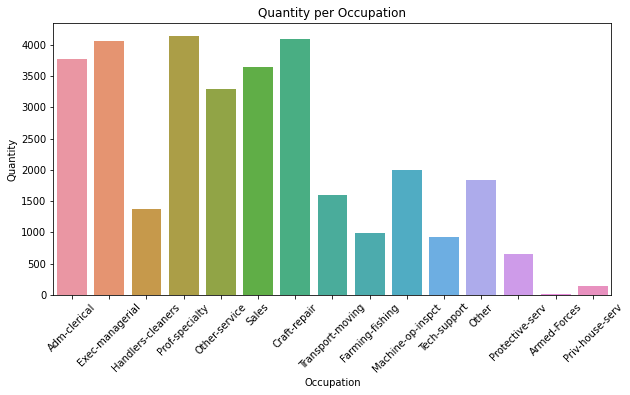

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='occupation', data=df, orient='v')
plt.title('Quantity per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

- Workclass plot

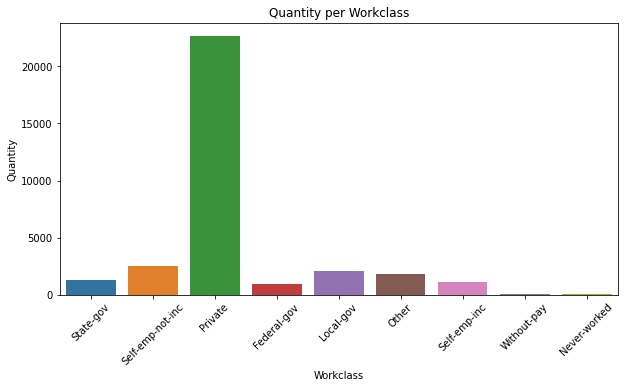

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='workclass', data=df, orient='v')
plt.title('Quantity per Workclass')
plt.xlabel('Workclass')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

- Education plot

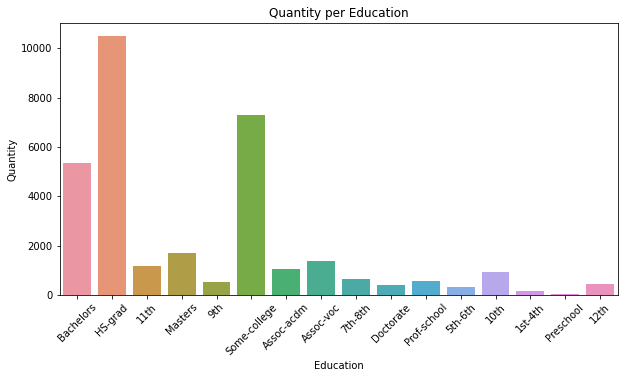

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', data=df, orient='v')
plt.title('Quantity per Education')
plt.xlabel('Education')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

- Pairplot

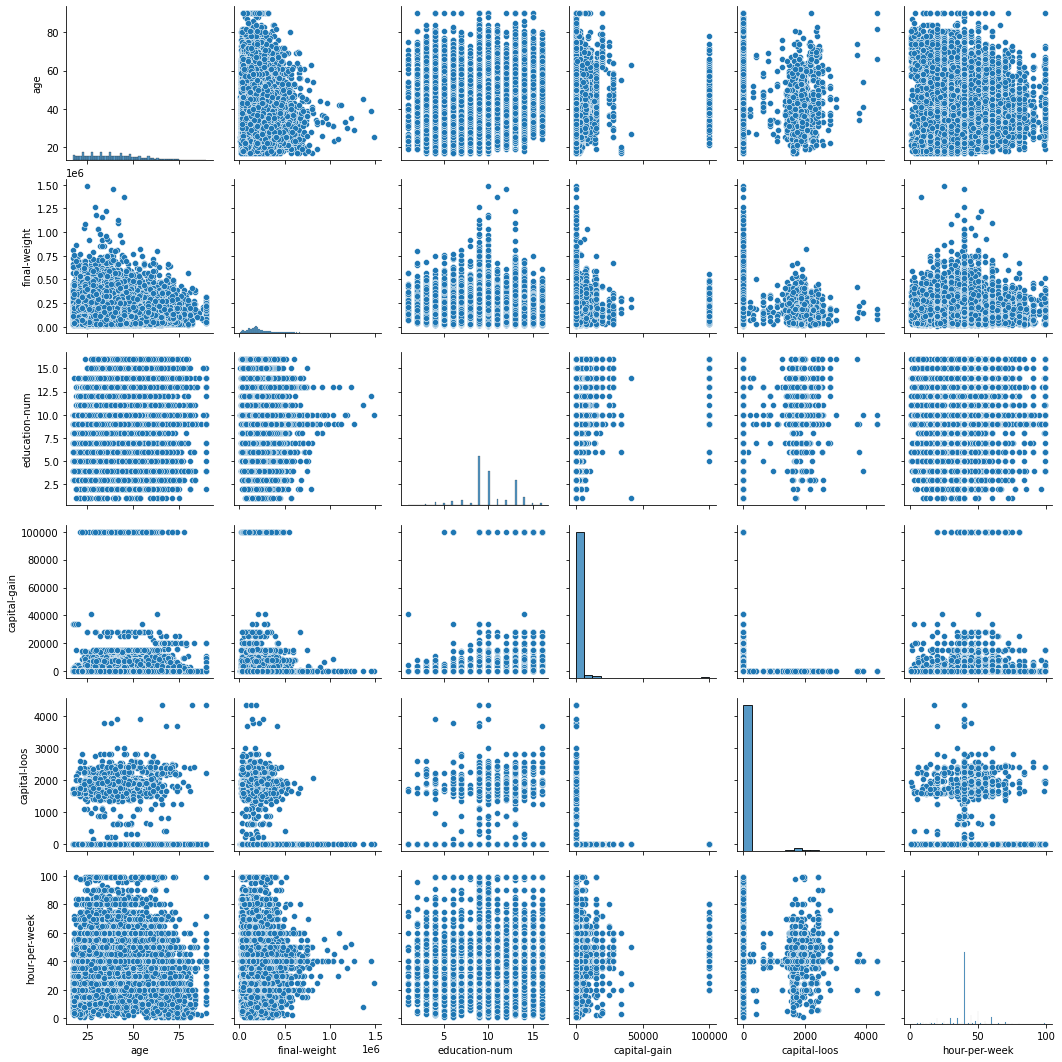

In [14]:
sns.pairplot(data=df)
plt.show()

- Gender Plot

In [15]:
quant = df[['sex', 'age']].groupby(['sex']).count()
perc = quant.apply(lambda x: 100 * x / float(x.sum()))
perc.rename({'age': 'porcentagem'}, inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


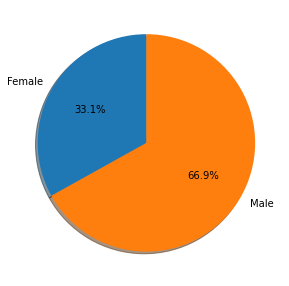

In [16]:
fig = plt.figure(figsize=(5,5))
labels = ('Male', 'Female')
percent = perc['porcentagem']
plt.pie(perc.values, 
        labels=perc.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True)
plt.show()

- Bar Plot - Race

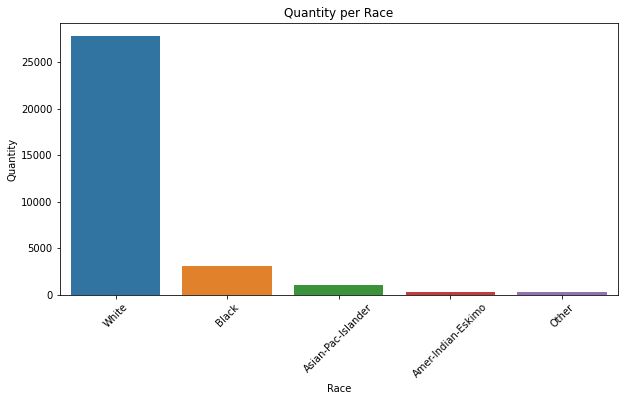

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='race', data=df, orient='v')
plt.title('Quantity per Race')
plt.xlabel('Race')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

- Correlation between features

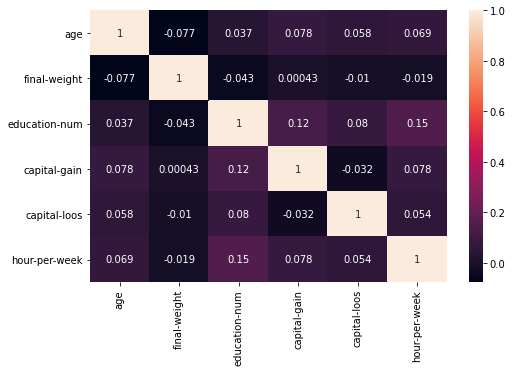

In [18]:
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(data=correlation, annot=True)
plt.show()

- Countplot for class

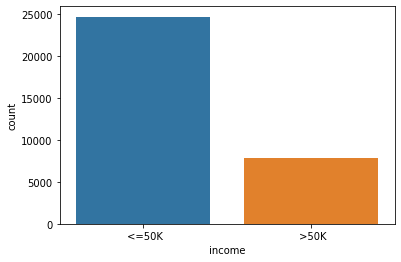

In [19]:
sns.countplot(data=df, x='income')
plt.show()

We can see that the classes are totally unbalanced.

- Histogram
1. Original data

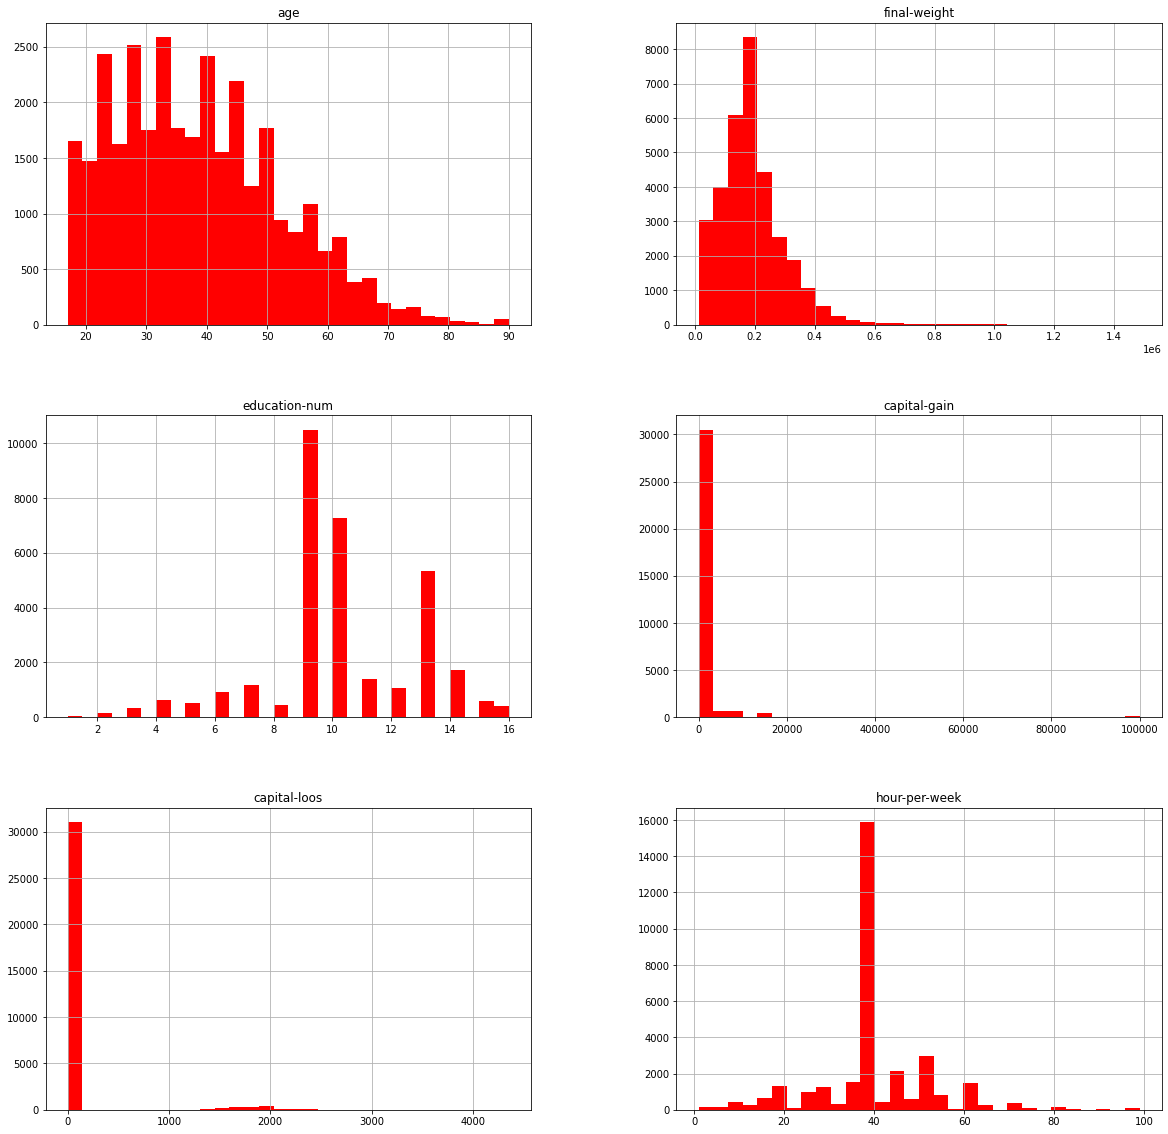

In [20]:
df.hist(bins=30, figsize=(20,20), color='r');

2. Data in logarithmic scale

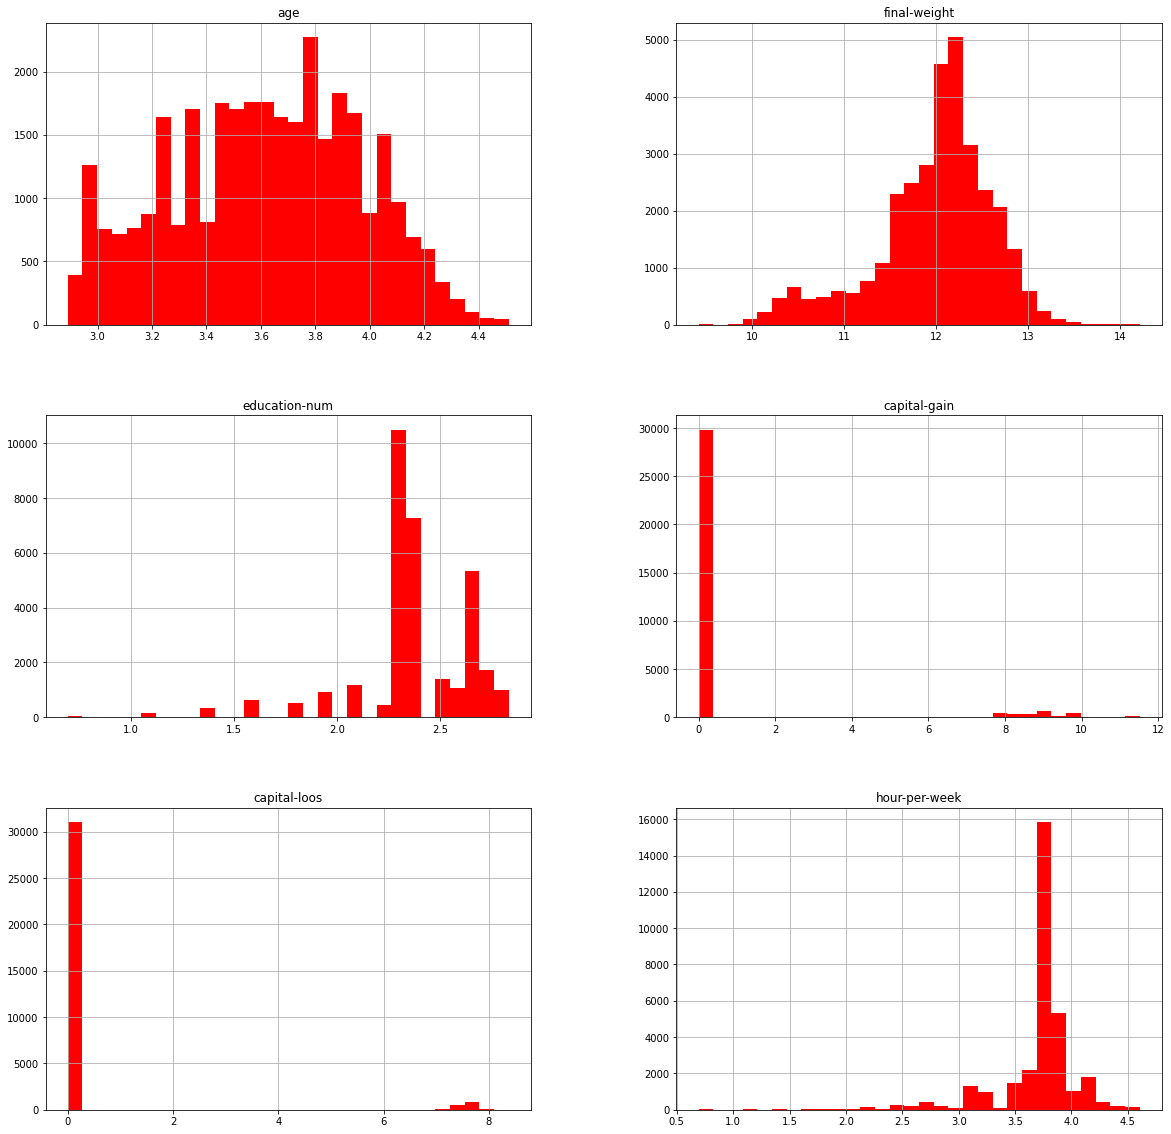

In [21]:
# Creating a dataframe containing numerical data
df_numeric = df[['age', 'final-weight',	'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']]

# Plot histogram
np.log1p(df_numeric).hist(bins=30, figsize=(20,20), color='r');

## 3) Preprocessing Data

- Label Encoder

In [85]:
# Transform categorical features
label_encoder = LabelEncoder()

In [23]:
df['income'] = label_encoder.fit_transform(df['income'])

- One Hot Encoder

In [24]:
df = pd.get_dummies(data=df)

In [25]:
df.head()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(32561, 109)

- Standard Scaler

In [26]:
scaler = StandardScaler()

In [86]:
# Predict features
X = df.drop(labels='income', axis=1)

# Class feature
y = df['income']

In [28]:
X[['age', 'final-weight', 
   'education-num', 'capital-gain', 
   'capital-loos', 'hour-per-week']]

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [29]:
X[['age', 'final-weight', 
   'education-num', 'capital-gain', 
   'capital-loos', 'hour-per-week']] = scaler.fit_transform(X[['age', 'final-weight', 
                                                               'education-num', 'capital-gain', 
                                                               'capital-loos', 'hour-per-week']])

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

## 4) Machine Learning

In [34]:
# Using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=0)

Now we are going to create a model that we expect to predict the salary of those citzen described above. So let's use the folowing classifiers.

4.1) Árvore de decisão

In [50]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore.fit(X_train, y_train)
previsoes = arvore.predict(X_test)
score = accuracy_score(y_test, previsoes)
print(score)

0.8073694984646879


0.8073694984646879

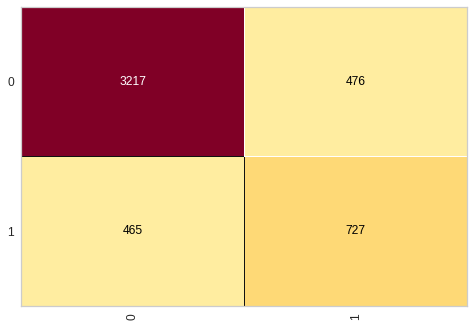

In [66]:
cm = ConfusionMatrix(arvore)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [51]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3693
           1       0.60      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



4.2) Randon forest

In [52]:
randon_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
randon_forest.fit(X_train, y_train)
previsoes = randon_forest.predict(X_test)
score = accuracy_score(y_test, previsoes)
print(score)

0.852200614124872


0.852200614124872

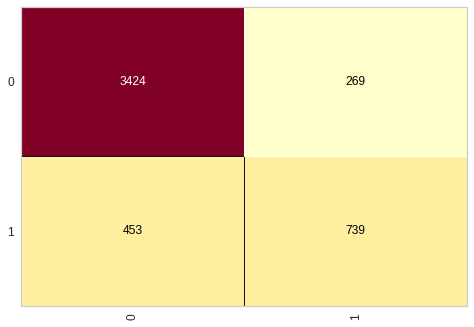

In [67]:
cm = ConfusionMatrix(randon_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [53]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3693
           1       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



4.3) Naive bayes

In [54]:
naive = GaussianNB()
naive.fit(X_train, y_train)
previsoes = naive.predict(X_test)
score = accuracy_score(y_test, previsoes)
print(score)

0.5547594677584442


0.5547594677584442

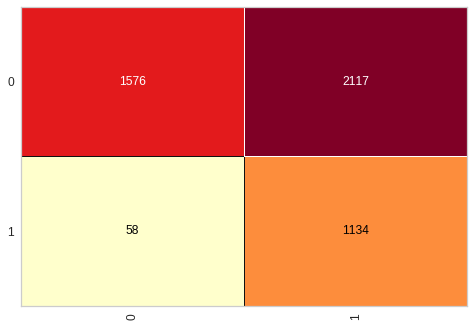

In [72]:
cm = ConfusionMatrix(naive)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [55]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.43      0.59      3693
           1       0.35      0.95      0.51      1192

    accuracy                           0.55      4885
   macro avg       0.66      0.69      0.55      4885
weighted avg       0.81      0.55      0.57      4885



4.4) kNN

In [56]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)
score = accuracy_score(y_test, previsoes)
print(score)

0.8307062436028659


0.8307062436028659

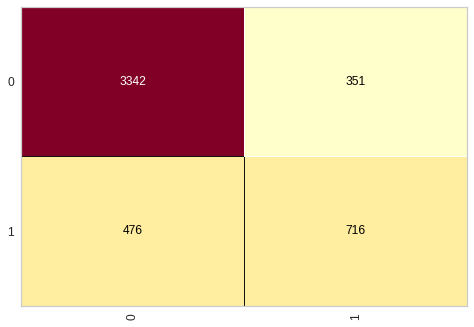

In [71]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [57]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3693
           1       0.67      0.60      0.63      1192

    accuracy                           0.83      4885
   macro avg       0.77      0.75      0.76      4885
weighted avg       0.83      0.83      0.83      4885



4.5) Regressão logística

In [58]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)
score = accuracy_score(y_test, previsoes)
print(score)

0.849539406345957


0.849539406345957

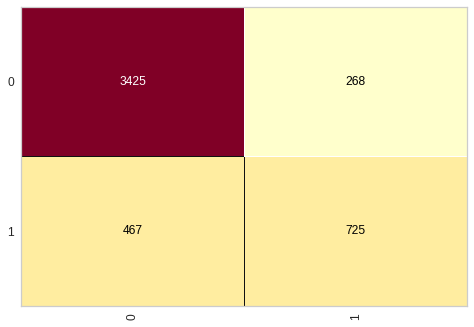

In [70]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [59]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3693
           1       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



4.6) SVM

In [60]:
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train, y_train)
previsoes = svm.predict(X_test)
score = accuracy_score(y_test, previsoes)
print(score)

0.8511770726714432


0.8511770726714432

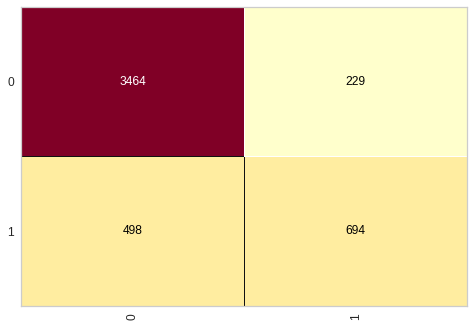

In [69]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [61]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3693
           1       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



4.7) Rede Neural

In [62]:
rede_neural = MLPClassifier(max_iter=1000, tol=0.000010)
rede_neural.fit(X_train, y_train)
previsoes = rede_neural.predict(X_test)
score = accuracy_score(y_test, previsoes)
print(score)

0.8362333674513818


0.8241555783009212

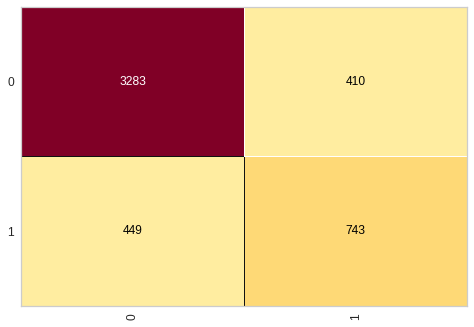

In [68]:
cm = ConfusionMatrix(rede_neural)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [63]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3693
           1       0.70      0.58      0.63      1192

    accuracy                           0.84      4885
   macro avg       0.79      0.75      0.76      4885
weighted avg       0.83      0.84      0.83      4885



## 5) Inbalanced classification

In [88]:
X_census = df.iloc[:,0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [89]:
y_census = df.iloc[:,14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [91]:
# Transform categorical features
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder() 
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [92]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [93]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [94]:
X_census.shape

(32561, 14)

In [95]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_sample(X_census, y_census)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [101]:
X_over.shape

(49440, 14)

In [98]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [99]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [102]:
# Using train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,
                                                                        y_over,
                                                                        test_size=0.15,
                                                                        random_state=0)

In [103]:
X_train_over.shape, X_test_over.shape

((42024, 14), (7416, 14))

### 5.1) Random forest

In [104]:
randon_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
randon_forest.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [105]:
previsoes = randon_forest.predict(X_test_over)
score = accuracy_score(y_test_over, previsoes)
print(score)

0.9079018338727076


0.9079018338727076

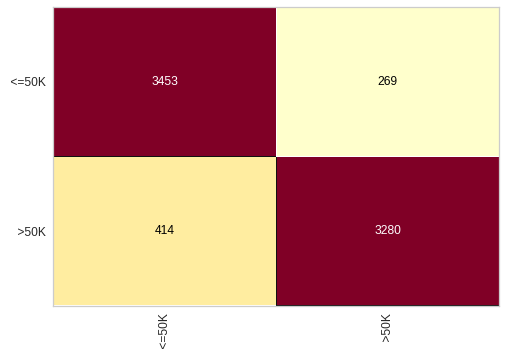

In [106]:
cm = ConfusionMatrix(randon_forest)
cm.fit(X_train_over, y_train_over)
cm.score(X_test_over, y_test_over)

In [107]:
print(classification_report(y_test_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

